<a href="https://colab.research.google.com/github/akhilshetty97/handwritten_digits_classification/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

In [12]:
from io import IncrementalNewlineDecoder
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

Load the MNIST dataset, which contains 60,000 training images and 10,000 test images of handwritten digits. Each image is 28x28 pixels.

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


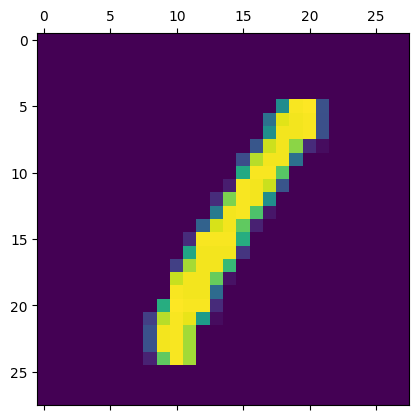

In [16]:
plt.matshow(X_train[3])

In [23]:
X_train.shape


(60000, 28, 28)

**Normalize the Data:**
Normalizes the pixel values of the images from the range [0, 255] to [0, 1] by dividing by 255. This helps in faster convergence during training.

In [24]:
X_train= X_train/255
X_test = X_test/255

**Flatten the Images:**
Reshapes the 28x28 images into 784-dimensional vectors to prepare them for input into the neural network.

In [25]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

1.   **Build the Neural Network Model:**
Defines a sequential model with two dense (fully connected) layers:
First layer: 50 neurons, ReLU activation, input shape of 784 (flattened image).
Second layer: 10 neurons, sigmoid activation (output layer for 10 classes).
2.   **Compile the Model:**
Configures the model for training:
optimizer='adam': Adam optimization algorithm.
loss='sparse_categorical_crossentropy': Loss function for multi-class classification.
metrics=['accuracy']: Metric to monitor during training and evaluation.
3.   **Train the Model:**
Trains the model on the training data for 5 epochs (iterations over the entire dataset).






In [37]:
model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2736 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1256 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0872 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0658 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9845


In [38]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0947 - accuracy: 0.9730


[0.09474683552980423, 0.9729999899864197]

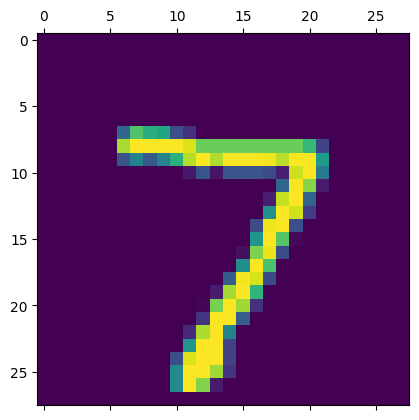

In [39]:
plt.matshow(X_test[0])

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([2.3714553e-03, 5.8370796e-03, 2.3814470e-01, 6.9888896e-01,
       3.0850235e-05, 4.0168658e-02, 6.1631027e-08, 9.9998707e-01,
       1.2964217e-01, 7.4414772e-01], dtype=float32)

In [34]:
np.argmax(y_predicted[0])

7